11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 8s 1us/step


c:\Users\krish\AI-labs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8654 - loss: 0.4641 - val_accuracy: 0.9577 - val_loss: 0.1380
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9654 - loss: 0.1165 - val_accuracy: 0.9666 - val_loss: 0.1060
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9767 - loss: 0.0762 - val_accuracy: 0.9637 - val_loss: 0.1218
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9818 - loss: 0.0567 - val_accuracy: 0.9712 - val_loss: 0.0990
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9876 - loss: 0.0398 - val_accuracy: 0.9730 - val_loss: 0.0947
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9894 - loss: 0.0324 - val_accuracy: 0.9757 - val_loss: 0.0939
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9912 - loss: 0.0279 - val_accuracy: 0.9747 - val_loss: 0.0976
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9921 - loss: 0.0222 - 

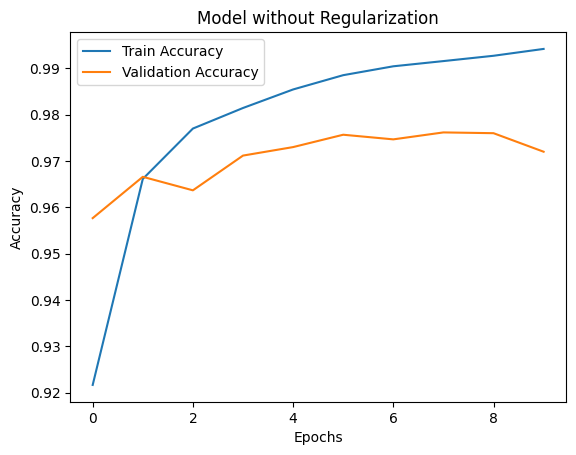

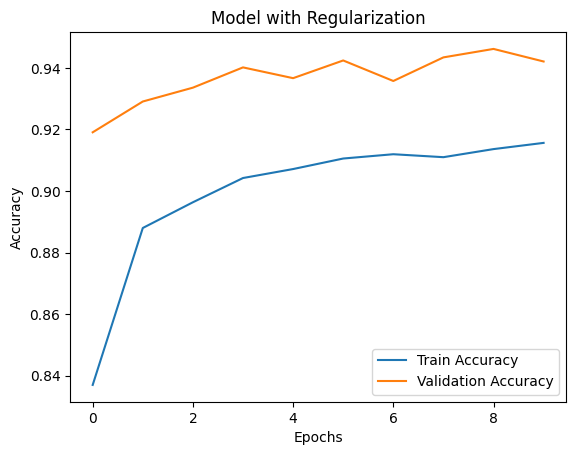

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the image data to scale pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images (28x28 to 784)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split training data further into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Build the ANN model
def create_model(use_regularization=False, use_dropout=False):
    model = keras.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(784,),
                           kernel_regularizer=regularizers.l2(0.01) if use_regularization else None))
    if use_dropout:
        model.add(layers.Dropout(0.3))
    
    model.add(layers.Dense(64, activation='relu',
                           kernel_regularizer=regularizers.l2(0.01) if use_regularization else None))
    if use_dropout:
        model.add(layers.Dropout(0.3))
    
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model without regularization and dropout
model_no_reg = create_model()
history_no_reg = model_no_reg.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

# Train the model with regularization and dropout
model_reg = create_model(use_regularization=True, use_dropout=True)
history_reg = model_reg.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

# Evaluate both models on the test set
test_loss_no_reg, test_acc_no_reg = model_no_reg.evaluate(x_test, y_test)
test_loss_reg, test_acc_reg = model_reg.evaluate(x_test, y_test)

print(f"Test Accuracy without Regularization: {test_acc_no_reg:.4f}")
print(f"Test Accuracy with Regularization: {test_acc_reg:.4f}")

# Plot training vs validation accuracy for both models
def plot_training_history(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_training_history(history_no_reg, "Model without Regularization")
plot_training_history(history_reg, "Model with Regularization")
